## Title: Predict NBA player earnings based on 2022-2023 season 

###  Predictive Question
How does NBA players' statistics predict their salary? 
Specific focus on: age, games played, total minutes played, total shooting percentage

### Introduction
The National Basketball Association (NBA) is a North American professional basketball league consisting of 2 conferences. Each conference has 3 divisions, and each division has 5 teams. The NBA is one of the major professional sports leagues in the United States and Canada. It is regarded as the highest-level men's professional basketball tournament in the world (National Basketball Association). NBA player's salary is increasing all the time. "In the NBA, players took home an average annual salary of over 10 million U.S. dollars for the 2022/23 season, with the league's minimum salary set at 1.12 million U.S. dollars that year" (Statistica, 2023). The player's salary is related to how they perform in the season. Based on Pastorello's analysis, salaries appear to be related more to common statistics like total minutes played, points, and games started (Pastorello, 2023). We are going to use a dataset from "basketball-reference.com", which provides precise statistics for all players. In this project, we are going to investigate the relationship between the players' salary and the following variables during the 2022-23 season:
* Position
* Age = age pf players
* GP = number of games played
* GS = number of games started 
* Total Minutes = total minutes played
* PTS = points
* eFG% = effective field goal percentage  (measures how successful your team is from the field, in percentage)
* TS% = true shooting percentage (measures accuracy of shooting, higher the better)
* WS = win shares (stats to show homuch a player contributed to a win)
* VORP = value over replacement player (“a box-score estimate of the points per 100 team possessions that a player contributed over a replacement-level player translated to an average team and prorated to an 82-game season”). In other words, if your VORP is 1, you are contributing 1 point more difference each game for the team

### Preliminary exploratory data analysis

In [4]:
library(tidyverse)
library(repr)
library(tidymodels)
install.packages("kknn")
install.packages("gridExtra")
library(kknn)
library(gridExtra)
library("kableExtra")
options(repr.matrix.max.rows = 6)
source("tests.R")
source('cleanup.R')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


### Methods
First, we loaded the nba stats dataset. It included over 50 variables we could do our analysis, so we wrangled our data and cut down the variables to 12. These 12 variables, we assumed to have impact on our research topic. Then, after debating, we decided to use 4 variables for our analysis.

In the 2022-2023 season dataset, the following variables were selected: 

    -Age: Often indicates a player's experience and professional maturity 

    -Games Played: Evidences a player's reliability 

    -Total Minutes Played: Indicates a player's significance to the team 

    -True Shooting Percent: Measures a player's ability to score efficiently 

The selection of these variables rests on the hypothesis that they especially determine a player's worth and, consequently, their salary. Observations with missing data will be removed. In addition, we filtered out players falling outside of the 2 standard deviation range. This was in an attempt to reduce bias from the outliers, such as star players who are being paid significant amount.

Next section is the summary of dataset were we created a table summary for the dataset itself and the 4 variables we used in our analysis. Followed by the section for visualization, our scatterplot will illustrate the relationship between each variable and the player's salary, aiding in the visualization of potential correlations. Additionally, histogram shows how the salary was distributed.

The main modeling technique we adapted was the multivariable linear regression, as we have multiple variables for predictor variables. We aim to provide an mathematical equation that describes the relationship between the predictor and response variables. In our case, 4 predictor variables and how they predict players' salary. To wrap up, we plotted the true values against our predicted values to visualize how well it predicted. With good predictors, the plots should lie around y=x axis. 

We hope this model will aid in estimating a player's earnings based on their performances. We believe that using this model we can also predict past player's wage in current dollar terms, based on their past performances. 

### Read the dataset using a relative path

In [5]:
nba <- read_csv("nba_2022-23.csv")
nba

New names:
• `` -> `...1`
Rows: 467 Columns: 52
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Player Name, Position, Team
dbl (49): ...1, Salary, Age, GP, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,⋯,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,⋯,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,⋯,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,⋯,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,⋯,0.0,16.4,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0
465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,⋯,23.7,21.4,0.0,0.0,0.1,0.106,-0.6,-1.4,-2.0,0
466,Jacob Gilyard,5849,PG,24,MEM,1,0,41.0,1.0,⋯,40.0,5.1,0.0,0.1,0.1,0.079,-7.8,1.7,-6.1,0


### Wrangling data
Since the data has large number of variables, we selected variabels which might be useful for the analysis 
to simplify our data.

In [6]:
nba_selected <- nba |>
select("Player Name", Salary, Position, Age, GP, GS, "Total Minutes", PTS, "eFG%", "TS%", WS, VORP) |>
rename(total_minutes = "Total Minutes") |>
rename(TSP = "TS%") |>
rename(eFGP = "eFG%") 
nba_selected

Player Name,Salary,Position,Age,GP,GS,total_minutes,PTS,eFGP,TSP,WS,VORP
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Stephen Curry,48070014,PG,34,56,56,1941,29.4,0.614,0.656,7.8,4.7
John Wall,47345760,PG,32,34,3,755,11.4,0.457,0.498,0.3,0.1
Russell Westbrook,47080179,PG,34,73,24,2126,15.9,0.481,0.513,1.9,1.2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Gabe York,32171,SG,29,3,0,56,8,0.524,0.548,0.1,0
RaiQuan Gray,5849,PF,23,1,0,35,16,0.583,0.621,0.1,0
Jacob Gilyard,5849,PG,24,1,0,41,3,0.500,0.500,0.1,0


In [7]:
nba_filtered <- nba_selected |>
                   filter(abs(Salary - mean(Salary)) < 2 * sd(Salary)) |>
                   select(Salary, Age, GP, TSP, total_minutes)|>
                   drop_na()

nba_filtered

Salary,Age,GP,TSP,total_minutes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29776785,26,67,0.581,2405
28400000,37,59,0.555,1889
28333334,36,55,0.565,1718
⋮,⋮,⋮,⋮,⋮
32171,29,3,0.548,56
5849,23,1,0.621,35
5849,24,1,0.500,41


### Summary of the dataset

Below are tables that summarizes the datasets and the variables we used. First table is a little summary of the datasets. Table underneath is a summary of the variables we used in our analysis.

In [8]:
Summary_dataset<-summarize(nba_filtered,
          "Number of observations" = nrow(nba_filtered),
          "Rows with missing data" = sum(is.na(nba_filtered))) #|> labs(title = "Table 1: Summary of dataset")

results_salary <- nba_filtered |>
    summarize(variable = "Salary", max = max(Salary),min = min(Salary),mean = formatC(mean(Salary),digits=8)) 
results_age <- nba_filtered |>
    summarize(variable = "Age", max = max(Age),min = min(Age),mean = formatC(mean(`Age`),digits=4) )
results_GP <- nba_filtered |>
    summarize(variable = "GP", max = max(GP),min = min(GP),mean = formatC(mean(`GP`),digits=4)) 
results_mins <- nba_filtered |>
    summarize(variable = "Mins", max = max(total_minutes),min = min(total_minutes),mean = formatC(mean(total_minutes),digits=4)) 
results_TSP <- nba_filtered |>
    summarize(variable = "TSP", max = max(TSP),min = min(TSP),mean = formatC(mean(`TSP`),digits=4)) 

Summary_results <- rbind(results_salary,results_age,results_GP,results_mins,results_TSP) 

Summary_dataset
Summary_results
#knitr::kable(Summary_dataset,caption="Table 1: Summary of the dataset")
#knitr::kable(Summary_results,caption="Table 2: Summary of the variables")

Number of observations,Rows with missing data
<int>,<int>
425,0


variable,max,min,mean
<chr>,<dbl>,<dbl>,<chr>
Salary,29776785.000,5849,5705617.6
Age,42.000,19,25.5
GP,83.000,1,47.33
Mins,2963.000,2,1032
TSP,1.064,0,0.5598


### Visualization of dataset

As for the visualization, the histogram shows the distribution of the salary for NBA players in 2022/23 season. Additionally, we have added a vline at where the mean salary lies for better interpretation.

Scatter plots are to show the correlation between salary and each of the variables.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


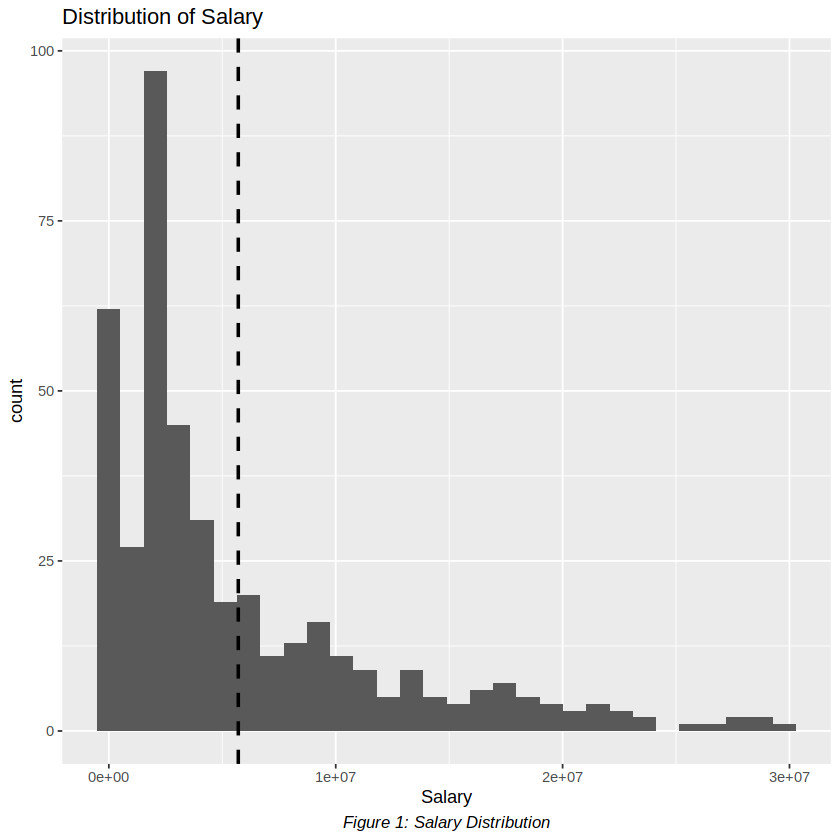

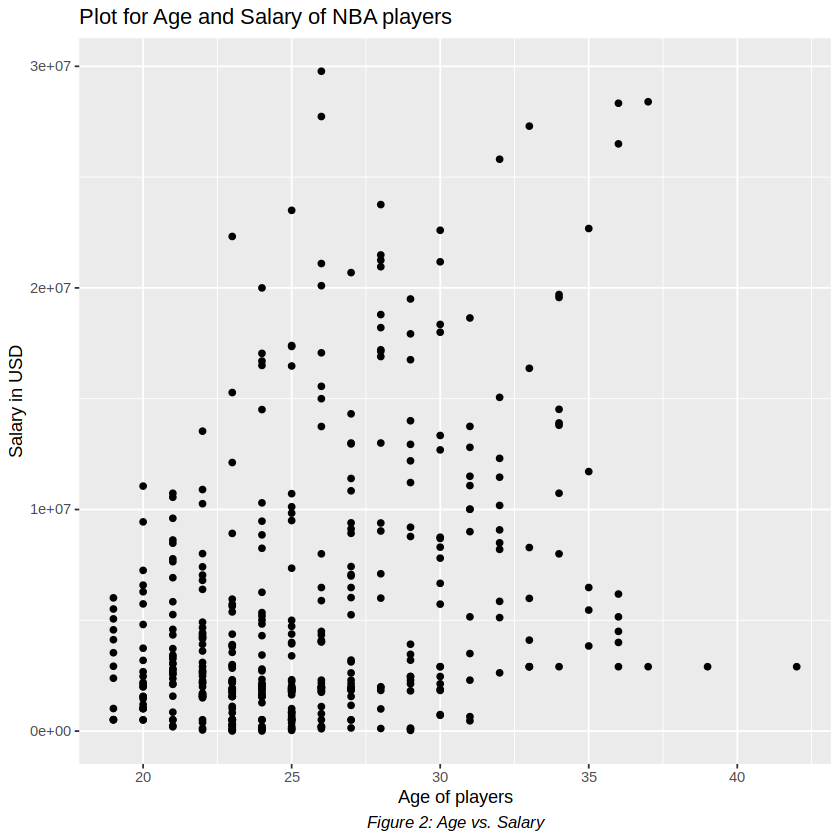

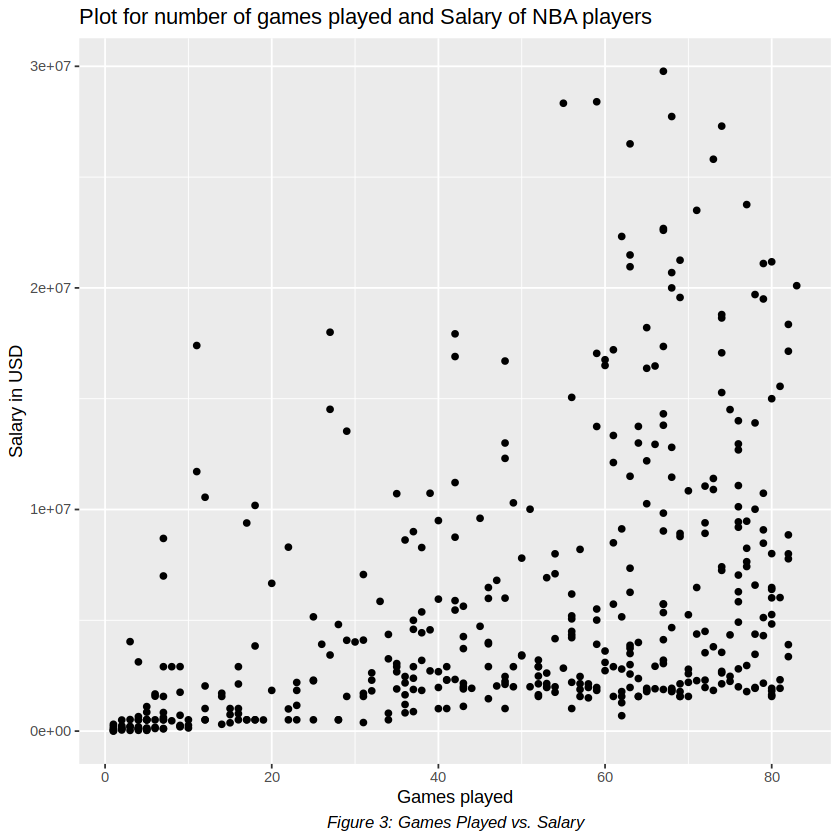

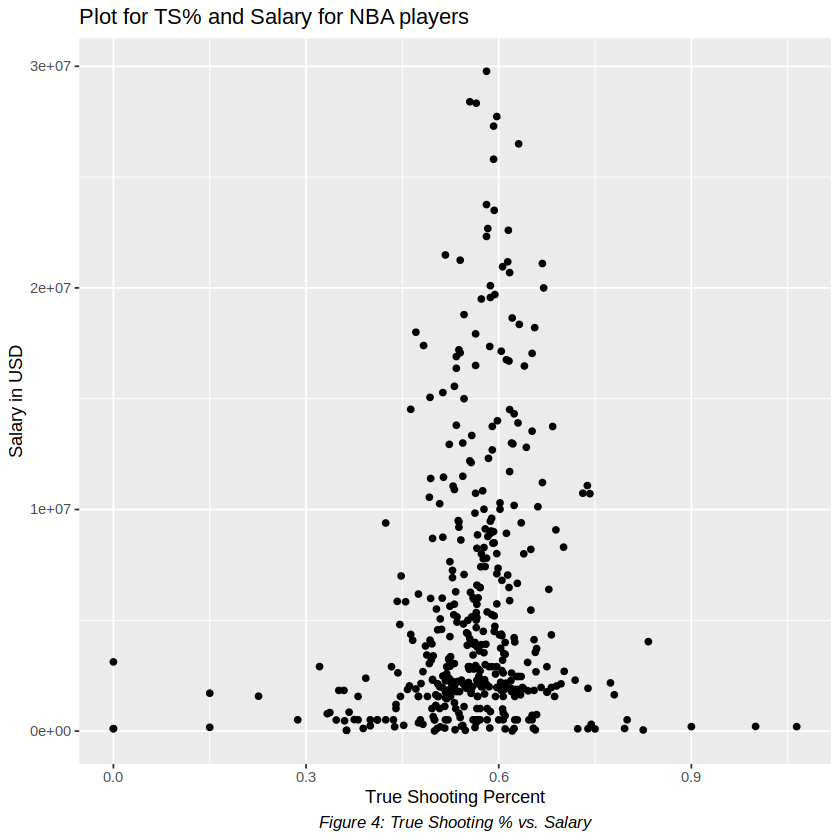

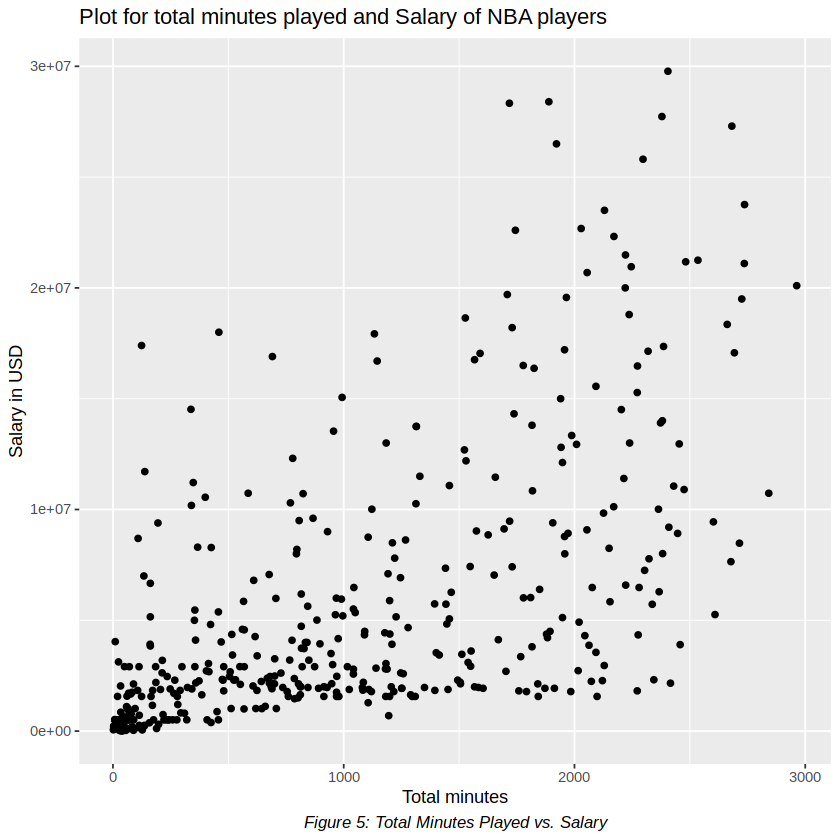

In [9]:
nba_salary_hist<- ggplot(nba_filtered, aes(x=Salary))+
                geom_histogram()+
                labs(x="Salary", title = "Distribution of Salary", caption="Figure 1: Salary Distribution")+
                geom_vline(xintercept = 5705617.6, linetype = "dashed", linewidth = 1)+ 
                theme(plot.caption = element_text(hjust = 0.5,size = 10,face = "italic"))

nba_salary_age_plot <- ggplot(nba_filtered, aes(x=Age, y=Salary))+
                        geom_point()+
                        labs(x="Age of players",y="Salary in USD",title="Plot for Age and Salary of NBA players",
                             caption = "Figure 2: Age vs. Salary")+ 
                theme(plot.caption = element_text(hjust = 0.5,size = 10,face = "italic"))
    
 
nba_salary_GP_plot <- ggplot(nba_filtered, aes(x=GP, y=Salary))+
                        geom_point()+
                        labs(x="Games played",y="Salary in USD",title="Plot for number of games played and Salary of NBA players",
                             caption = "Figure 3: Games Played vs. Salary")+ 
                theme(plot.caption = element_text(hjust = 0.5,size = 10,face = "italic"))

nba_salary_TSP_plot <- ggplot(nba_filtered, aes(x=TSP, y=Salary))+
                        geom_point()+
                        labs(x="True Shooting Percent",y="Salary in USD",title="Plot for TS% and Salary for NBA players",
                             caption = "Figure 4: True Shooting % vs. Salary")+ 
                theme(plot.caption = element_text(hjust = 0.5,size = 10,face = "italic"))

nba_salary_mins_plot <- ggplot(nba_filtered, aes(x=total_minutes, y=Salary))+
                        geom_point()+
                        labs(x="Total minutes",y="Salary in USD",title="Plot for total minutes played and Salary of NBA players",
                             caption = "Figure 5: Total Minutes Played vs. Salary")+ 
                theme(plot.caption = element_text(hjust = 0.5,size = 10,face = "italic"))

nba_salary_hist
nba_salary_age_plot
nba_salary_GP_plot
nba_salary_TSP_plot
nba_salary_mins_plot

### Perform analysis

In [10]:
set.seed(1)
nba_split <- initial_split(nba_filtered, prop = 0.8, strata = Salary)
nba_training <- training(nba_split) #training data
nba_testing <- testing(nba_split) #testing data

In [11]:
nba_recipe <- recipe(Salary ~., data = nba_training) #create recipe to preprocess data

nba_spec <- linear_reg()|> #model specification
set_engine("lm") |>
set_mode("regression")

In [12]:
nba_fit <- workflow() |> #build the workflow and fit the model
add_recipe(nba_recipe) |>
add_model(nba_spec) |>
fit(data = nba_training)
nba_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
  (Intercept)            Age             GP            TSP  total_minutes  
    -10778118         528004         -92459        -379557           7226  


In [13]:
nba_test_result <- nba_fit |> 
  predict(nba_testing) |>
  bind_cols(nba_testing)
nba_test_result

.pred,Salary,Age,GP,TSP,total_minutes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16053979,26500000,36,63,0.631,1922
15741927,25806468,32,73,0.592,2297
16443692,23760000,28,77,0.581,2737
⋮,⋮,⋮,⋮,⋮,⋮
-88655.25,193027,21,9,0.438,83
1791633.67,160856,24,2,0.563,41
1086040.94,58493,23,1,0.532,2


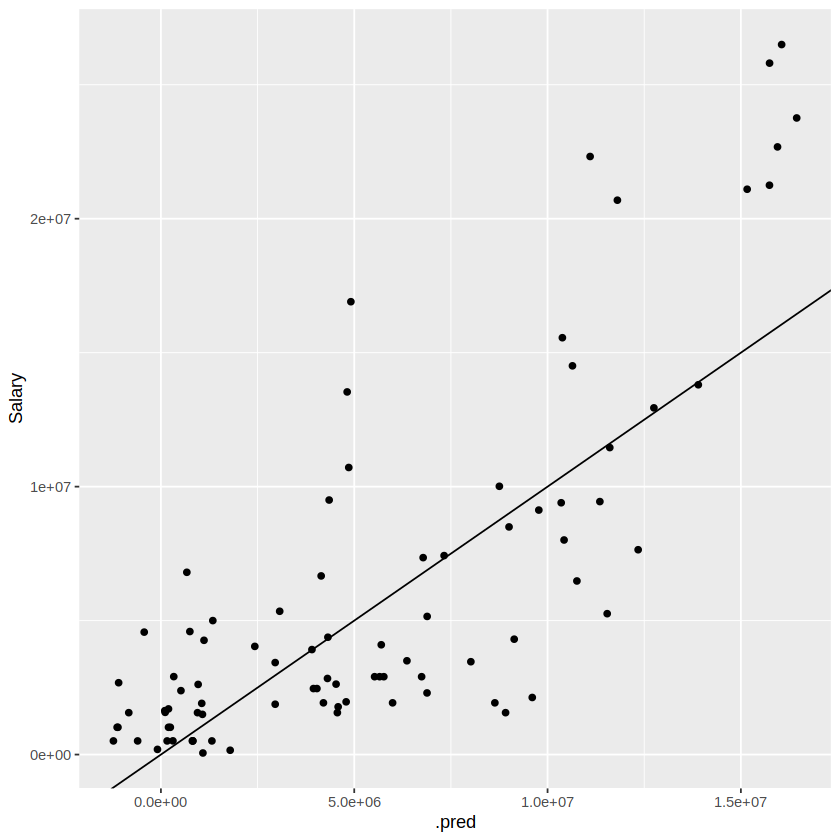

In [14]:
nba_test_results_plot <- ggplot(nba_test_result, aes(x=.pred,y=Salary)) +
                               geom_point()+
                                geom_abline(slope=1,intercept=0)

nba_test_results_plot

### Discussion:

The final linear regression model predicts a player's salary based on 4 variables, each with a corresponding coefficient:

   $Predicted \ Salary \ (USD)= -10778118 + (528004 * Age) - (92459 * GP) - (379557 * TSP) + (7226 * Total \ Minutes \ Played)$

* $Age$ (528004):
Indicates a significant positive correlation with salary, reflecting that even small increases in age within an NBA player’s limited age range can notably affect salary.

* $Games Played$ (-92459):
Suggests that playing more games does not necessarily lead to a higher salary, hinting at diminishing returns or other complex team dynamics at play.

* $Total Scoring Percentage$ (-379557):
Signals that a player's scoring efficiency alone does not dictate salary levels and may be offset by other factors in the model.

* $Total Minutes Played$ (7229):
Shows a positive but smaller-scale relationship with salary, as minutes played have a wider range and thus each additional minute has a more diluted effect on salary.

This explains the relation between predicted salary and each variable. For instance, an increase of one year in age is associated with a predicted salary increase of 528,004, whereas an additional game played is associated with a predicted salary decrease of 92,459, and so forth.

Visually examining $Figure 3$, the positive correlation between $Age$ and $Total Minutes Played$ is evident. Yet, when incorporating all 4 predictors into the model, the relationship between certain variables and salary becomes less intuitive. $Games Played$ shows a negative coefficient, contradicting the initial hypothesis that more games would always correlate with higher salaries. Similarly, $Total Scoring Percentage$ displays a negative relationship with salary in the multivariable context, despite a weak positive correlation as an isolated predictor in $Figure 4$.

The results did not entirely meet our expectations. Our predicted values were not the best as we see from the above plot, it overestimated for some and underestimated for others. We also did not expect a negative correlation between games played and true shooting percentage. Initially, it was hypothesized that all four variables would positively correlate with salary. While $Age$ and $Total Minutes Played$ do have a positive correlation with salary, supporting part of our expected findings, $Games Played$ and $Total Scoring Percentage$ have negative correlations when all variables are considered together. A possible reason for this result could be that we did not omit outliers well enough. For example, if one player earns 1 million for playing all 82 games and another earns the same amount but only plays 1 game due to injury; same salary but polar opposite values for the predictors. This creates a discrepancy that can affect the model's accuracy. These outliers likely influenced the results of our regression model.

Two factors in the NBA that may have influenced our model are the salary cap, which limits team spending on players each season, and the luxury tax, incurred when this limit is exceeded (Pastorello, 2023). Thus, A player's performance, like $Total Scoring Percentage$, may be evaluated in relation to the performance of other players. This means that a player is assessed on their relative performance compared to others since a team can only spend up to a fixed amount. Additionally, a significant factor that influences an NBA player's value (and salary) is their marketability. It is very challenging to measure a player's marketability using a single metric. In general, a player's social media following on X (formally Twitter) does have a positive correlation with their NBA salary (Stice, 2020). These are variables that do not directly influence court performance but do influence a player's salary. Capturing these effects is challenging, particularly as some players may not be active on all social media platforms.

 ### Impact:
The findings of this data model would be significant to many different professionals working in the NBA. Some valuable uses include:
* Player valuation: By evaluating the correlation between the characteristics in our data model and salary, teams can allocate their budget better and place a premium on statistically valuable players, in turn maximizing their own monetary returns.
* Player salary negotiations: Players who are statistically valuable can use this data model as a negotiation point to negotiate a higher salary. Since high salaries indicate good performance on the court (Papadaki & Tsagris 2022), players can justify that if they possess qualities of high earners, they possess qualities that will be valuable in a team’s performance. 
* Training methods: Coaches can adjust their training and development methods to place more importance on the predictors that correlate with higher player salaries. Additionally, players themselves can make changes to their training and conditioning routines to improve the active variables that correlate with higher salary. For example, younger players will statistically be making less, so to improve their chances at a higher salary they can work on improving skills such as their true shooting percentage.
* Salary trends over time: The statistics of past players can be used to evaluate what salaries they would currently be making, and trends in the NBA can be analyzed based on the result. For example, if these salaries are lower for players from a certain past season, it can be assumed that the skills that positively correlate with salary were not at their best during that season. Coaches can then analyze gameplay from this season to evaluate the impact it had on the team’s performance, and then apply this knowledge to training their current team perform as well as possible. 
 

### Future questions:
* Does the team the player is on have an impact on their salary?  
* Do certain training methods yield higher salaries on average? 
* How significant is the impact of player injuries on salary?

### Reference

Basketball Statistics &amp; History of every Team &amp; NBA and WNBA players. Basketball. (n.d.). https://www.basketball-reference.com/ 

Papadaki, I., & Tsagris, M. (2022). Are NBA Players’ Salaries in Accordance with Their Performance on Court?. *Advances in Econometrics, Operational Research, Data Science and Actuarial Studies: Techniques and Theories* (pp. 405-428). Cham: Springer International Publishing. doi: 10.1007/978-3-030-85254-2_25.

Pastorello, G. (2023, September 9). Predicting NBA salaries with machine learning. Medium. https://towardsdatascience.com/predicting-nba-salaries-with-machine-learning-ed68b6f75566 

Statista Research Department. (2023, October 24). Annual wages in the NBA &amp; WNBA 2023/24. Statista. https://www.statista.com/statistics/1120680/annual-salaries-nba-wnba/ 

Wikimedia Foundation. (2023, December 7). National Basketball Association. Wikipedia. https://en.wikipedia.org/wiki/National_Basketball_Association 

Stice, Z. (2020, April 6). Athlete branding: Does social media presence impact NBA players’ on-court salaries? Samford. https://www.samford.edu/sports-analytics/fans/2020/Athlete-Branding-Does-Social-Media-Presence-Impact-NBA-Players-On-Court-Salaries